In [10]:
!pip install -q plotly

In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [12]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


file_path = 'data/wine_data.csv'

if not os.path.exists(file_path):
    df.to_csv(file_path, sep=';', index=False, encoding='utf-8')
    print(f'Arquivo {file_path} criado com sucesso.')
else:
    print(f'O arquivo {file_path} já existe. Nenhuma ação foi realizada.')


O arquivo data/wine_data.csv já existe. Nenhuma ação foi realizada.


## EDA

In [11]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
df.shape

(178, 14)

In [13]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [14]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


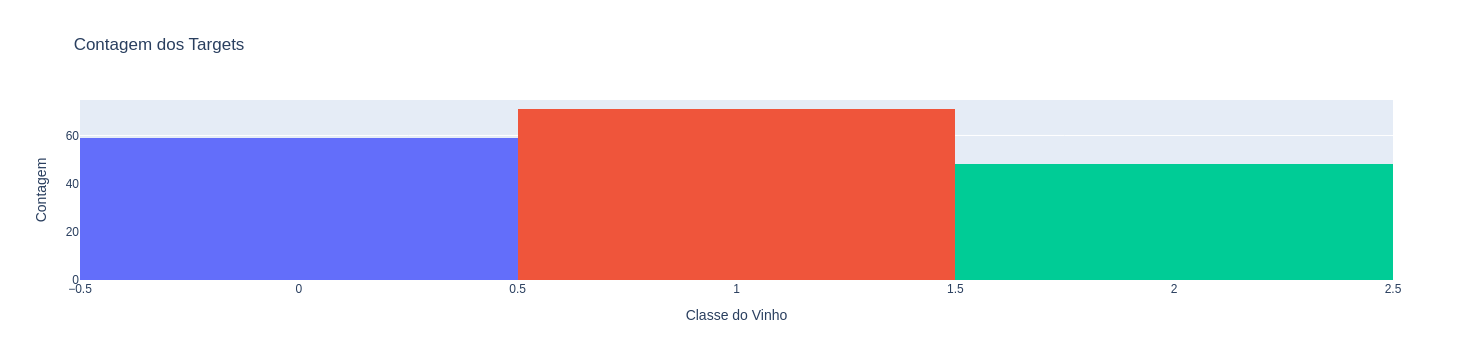

In [18]:
fig = px.histogram(df, x='target', title='Contagem dos Targets',
                   labels={'target': 'Classe do Vinho'},
                   color='target', 
                   color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(xaxis_title='Classe do Vinho', 
                  yaxis_title='Contagem', 
                  showlegend=False)


fig.show()

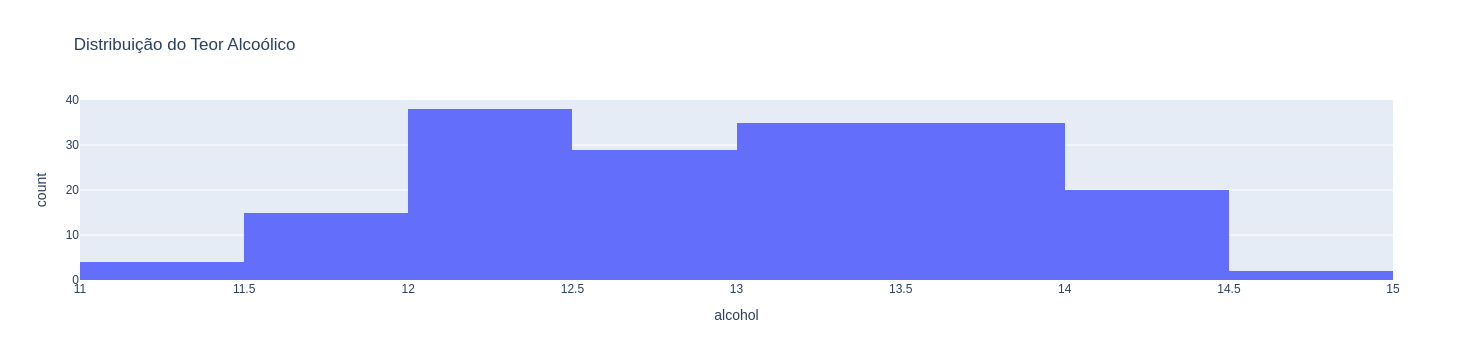

In [19]:
fig = px.histogram(df, x='alcohol', title='Distribuição do Teor Alcoólico')
fig.show()

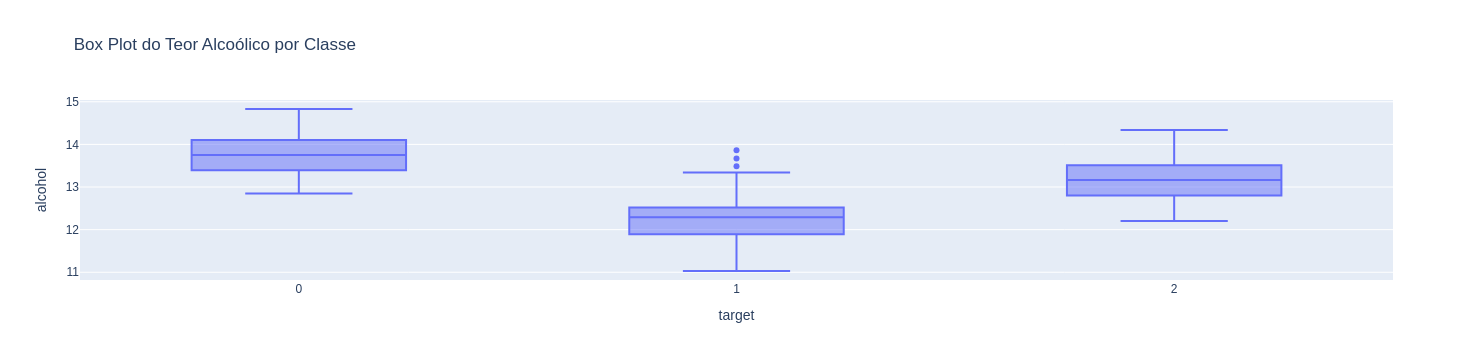

In [28]:
fig = px.box(df, x='target', y='alcohol', title='Box Plot do Teor Alcoólico por Classe')
fig.show()

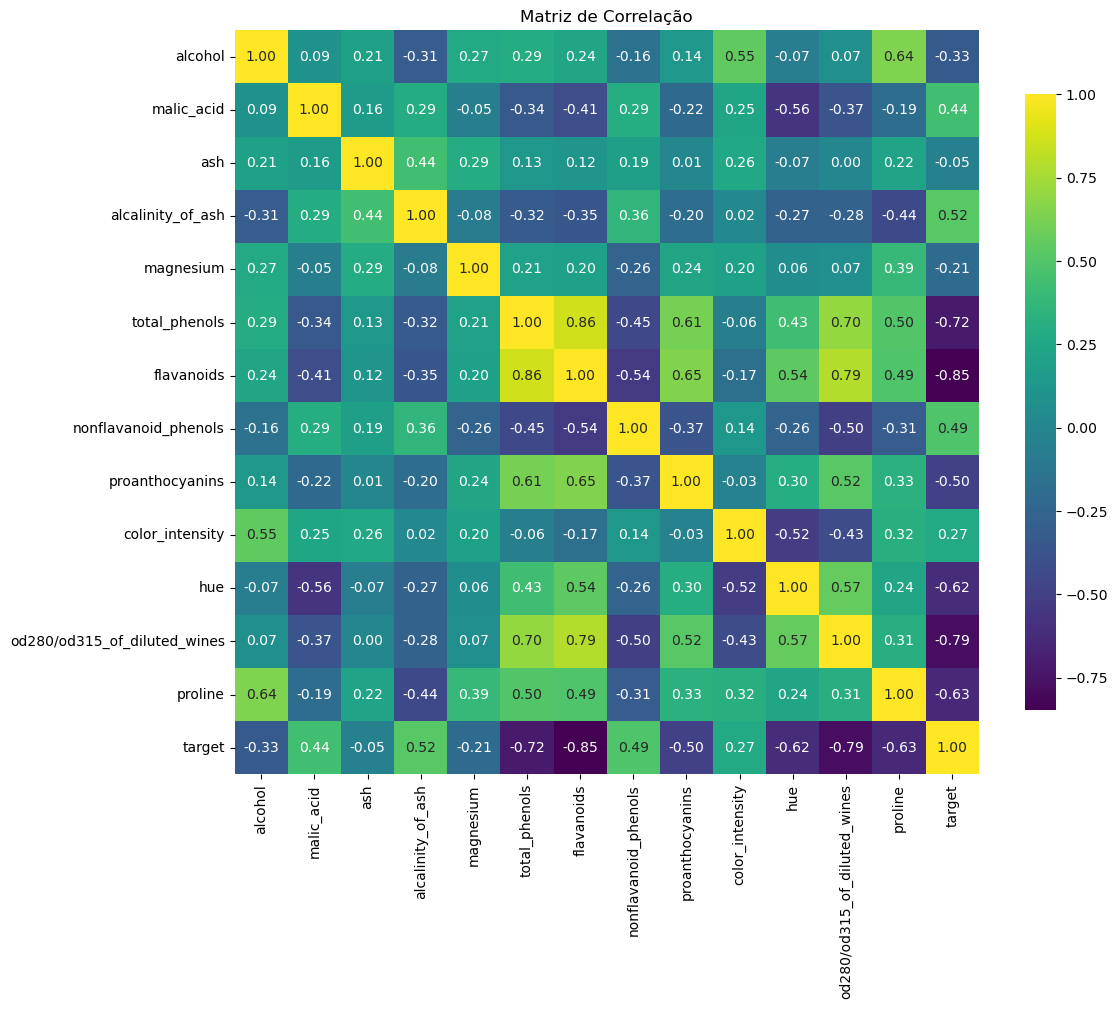

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()

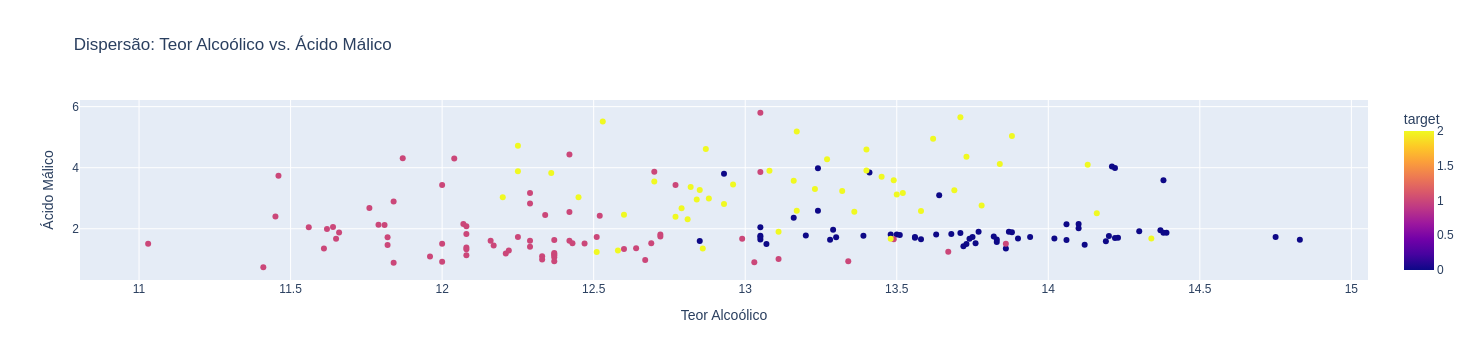

In [22]:
fig = px.scatter(df, x='alcohol', y='malic_acid', color='target',
                 title='Dispersão: Teor Alcoólico vs. Ácido Málico',
                 labels={'alcohol': 'Teor Alcoólico', 'malic_acid': 'Ácido Málico'})
fig.show()

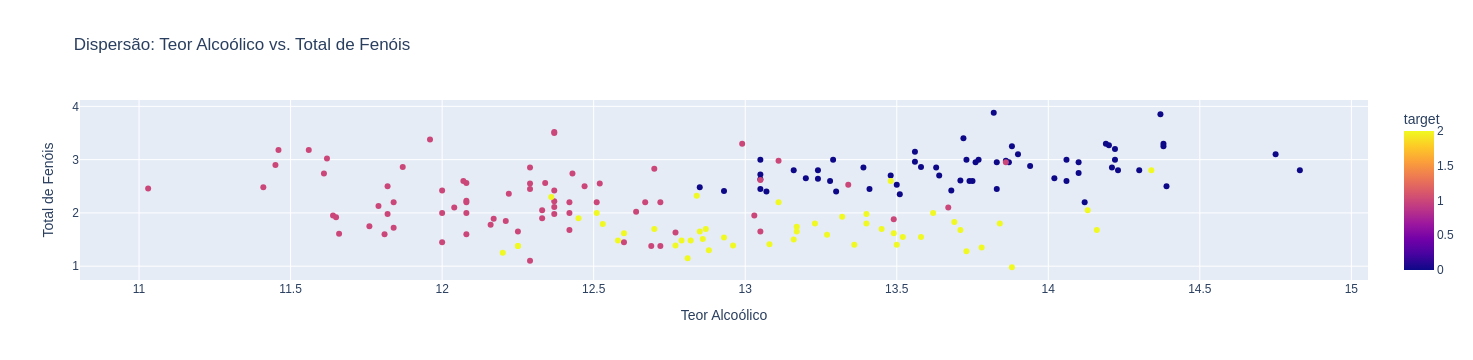

In [23]:
fig = px.scatter(df, x='alcohol', y='total_phenols', color='target',
                 title='Dispersão: Teor Alcoólico vs. Total de Fenóis',
                 labels={'alcohol': 'Teor Alcoólico', 'total_phenols': 'Total de Fenóis'})
fig.show()

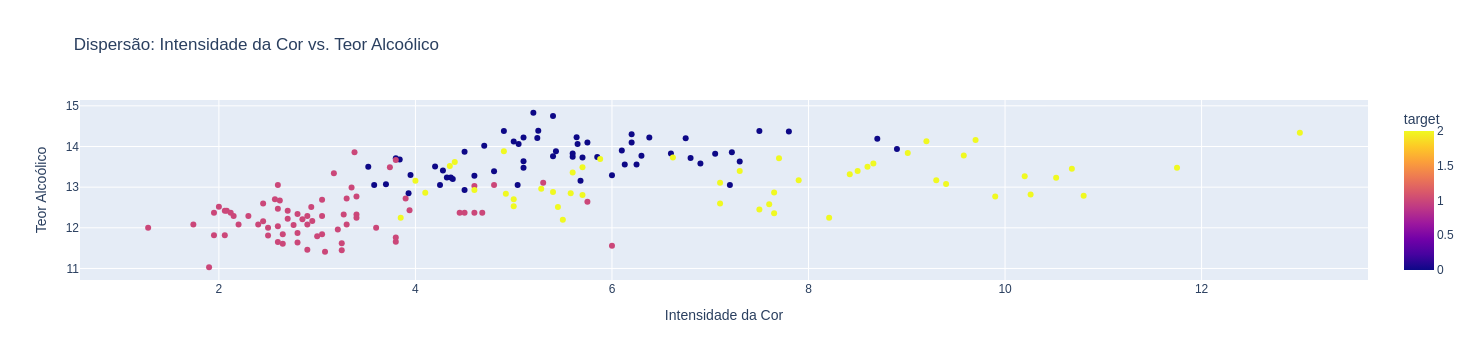

In [24]:
fig = px.scatter(df, x='color_intensity', y='alcohol', color='target',
                 title='Dispersão: Intensidade da Cor vs. Teor Alcoólico',
                 labels={'color_intensity': 'Intensidade da Cor', 'alcohol': 'Teor Alcoólico'})
fig.show()

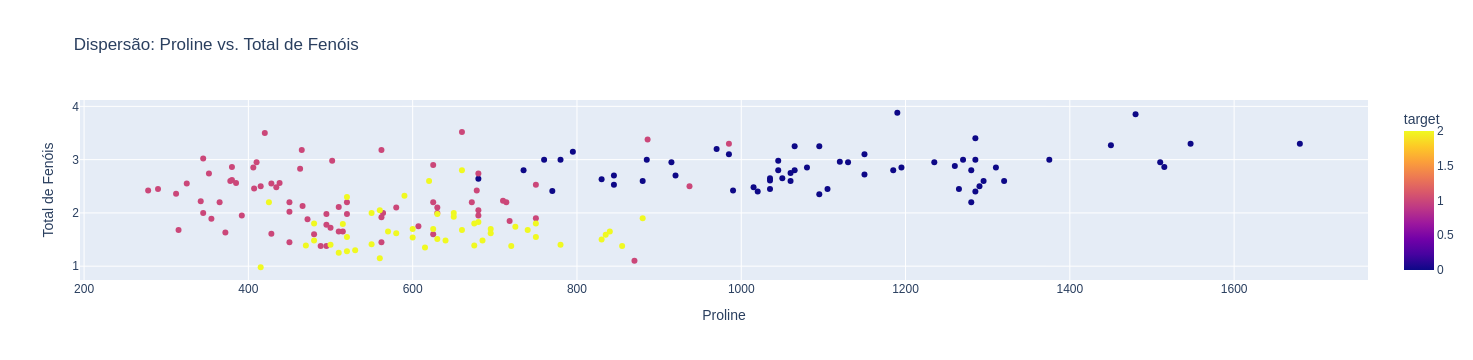

In [25]:
fig = px.scatter(df, x='proline', y='total_phenols', color='target',
                 title='Dispersão: Proline vs. Total de Fenóis',
                 labels={'proline': 'Proline', 'total_phenols': 'Total de Fenóis'})
fig.show()

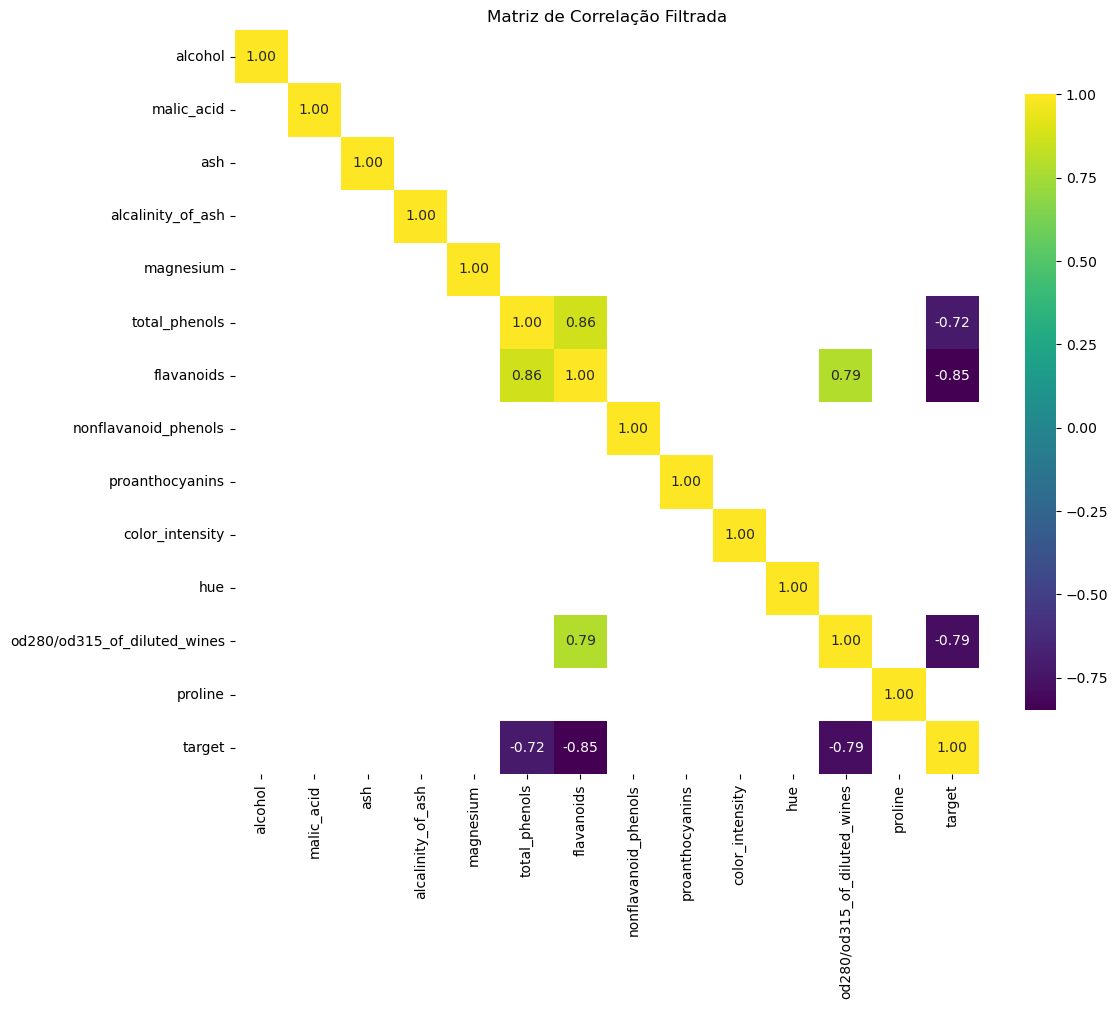

In [26]:

filtered_correlation = correlation_matrix[(correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)]
filtered_correlation = filtered_correlation.dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação Filtrada')
plt.show()

In [ ]:
columns = ['od280/od315_of_diluted_wines','total_phenols']
colunas_filter = [x for x in df.columns if x not in columns]
plt.figure(figsize=(12, 10))
sns.pairplot(df[colunas_filter], hue='target', palette='viridis', diag_kind='kde')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

## Create Model

In [16]:
!pip install -q lightgbm

#### Lightgbm

In [17]:
import mlflow
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlflow.set_tracking_uri('http://mlflow-web:5000')
experiment_name = "wines_classification"
mlflow.set_experiment(experiment_name)
mlflow.autolog()  

columns_features = ['alcohol', 
                    'malic_acid', 
                    'ash', 
                    'alcalinity_of_ash', 
                    'magnesium',
                    'total_phenols', 
                    'flavanoids', 
                    'nonflavanoid_phenols',
                    'proanthocyanins', 
                    'hue',
                    'od280/od315_of_diluted_wines', 
                    'proline']

X = df[columns_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',
    'num_class': 3,  
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

callbacks = [lgb.early_stopping(stopping_rounds=2)]

with mlflow.start_run():
    model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, callbacks=callbacks)
    
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia do modelo: {accuracy:.4f}")
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.lightgbm.log_model(model, "lightgbm_model") 


2024/10/02 01:52:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/10/02 01:52:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/10/02 01:52:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 12
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 2 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

2024/10/02 01:52:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 01:52:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run silent-hare-734 at: http://mlflow-web:5000/#/experiments/3/runs/b65f4582daa246f89e4b9f113f3210a3.
2024/10/02 01:52:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow-web:5000/#/experiments/3.


In [13]:
from sklearn.metrics import confusion_matrix

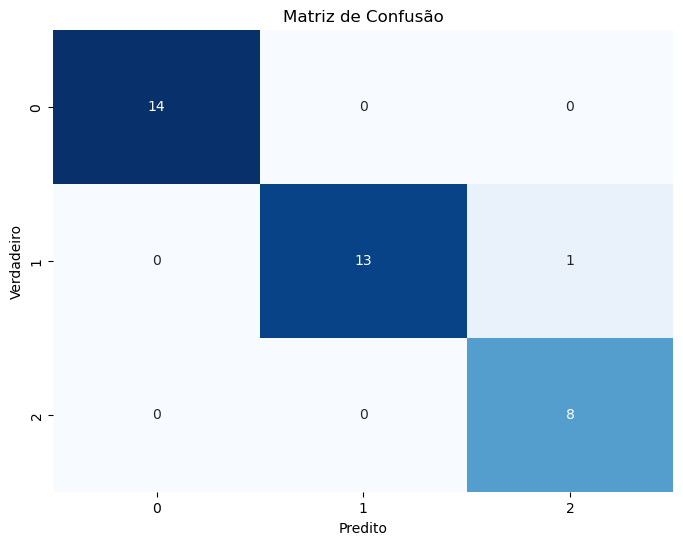

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

target_labels = df['target'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=target_labels, yticklabels=target_labels) 
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [14]:
from sklearn.metrics import roc_curve, auc

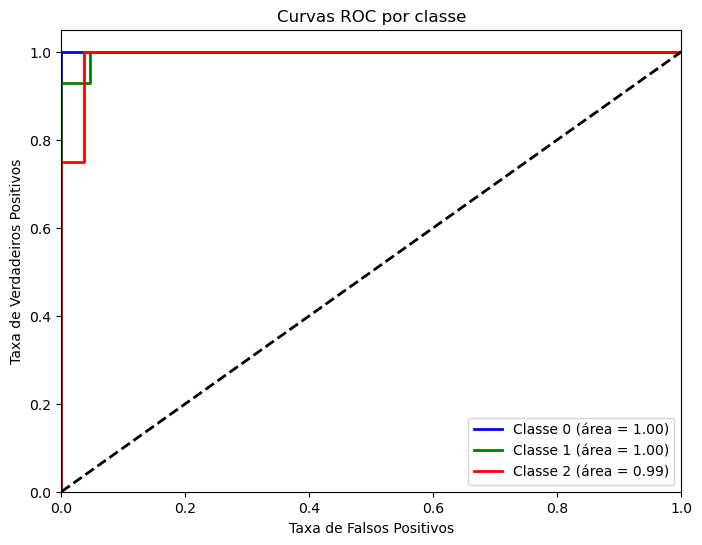

In [23]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {i} (área = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC por classe')
plt.legend(loc="lower right")
plt.show()

#### RandomForestClassifier

In [6]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

mlflow.set_tracking_uri('http://mlflow-web:5000')
experiment_name = "wines_classification"
mlflow.set_experiment(experiment_name)
mlflow.autolog()  

columns_features = ['alcohol', 
                    'malic_acid', 
                    'ash', 
                    'alcalinity_of_ash', 
                    'magnesium',
                    'total_phenols', 
                    'flavanoids', 
                    'nonflavanoid_phenols',
                    'proanthocyanins', 
                    'hue',
                    'od280/od315_of_diluted_wines', 
                    'proline']

X = df[columns_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=10, random_state=42)

with mlflow.start_run():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia do modelo: {accuracy:.4f}")
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "random_forest_model")

2024/10/02 13:14:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/10/02 13:14:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


Acurácia do modelo: 0.9444


2024/10/02 13:14:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 13:14:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run bold-rook-536 at: http://mlflow-web:5000/#/experiments/3/runs/880f9f8b581f44dcab24f440fba9e8e3.
2024/10/02 13:14:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow-web:5000/#/experiments/3.


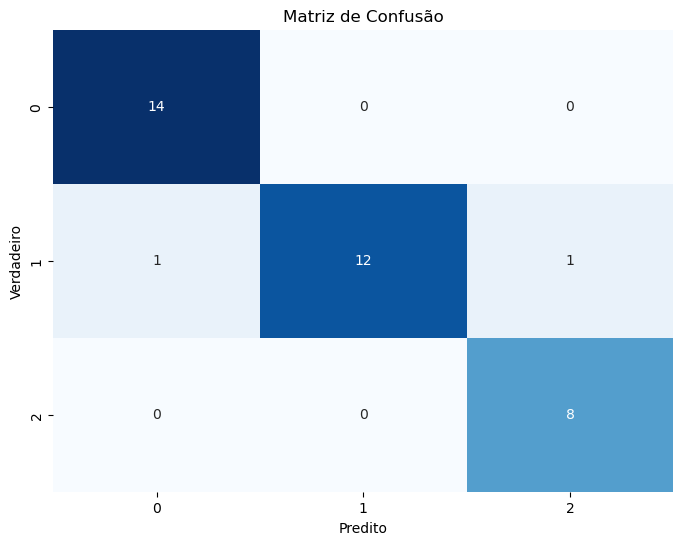

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

target_labels = df['target'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=target_labels, yticklabels=target_labels) 
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

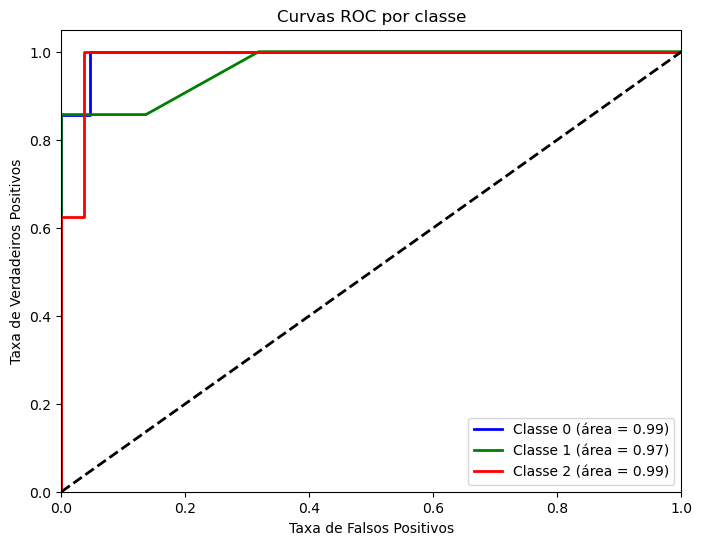

In [13]:
y_pred_proba = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {i} (área = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC por classe')
plt.legend(loc="lower right")
plt.show()

In [2]:
import mlflow
run_id = 's3://mlflow/3/880f9f8b581f44dcab24f440fba9e8e3/artifacts/random_forest_model'
model = mlflow.sklearn.load_model(run_id)

In [7]:
columns_features = ['alcohol', 
                    'malic_acid', 
                    'ash', 
                    'alcalinity_of_ash', 
                    'magnesium',
                    'total_phenols', 
                    'flavanoids', 
                    'nonflavanoid_phenols',
                    'proanthocyanins', 
                    'hue',
                    'od280/od315_of_diluted_wines', 
                    'proline']

model.predict(df[columns_features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

#### ExtraTreesClassifier

In [8]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

mlflow.set_tracking_uri('http://mlflow-web:5000')
experiment_name = "wines_classification"
mlflow.set_experiment(experiment_name)
mlflow.autolog()  

columns_features = ['alcohol', 
                    'malic_acid', 
                    'ash', 
                    'alcalinity_of_ash', 
                    'magnesium',
                    'total_phenols', 
                    'flavanoids', 
                    'nonflavanoid_phenols',
                    'proanthocyanins', 
                    'hue',
                    'od280/od315_of_diluted_wines', 
                    'proline']

X = df[columns_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesClassifier(n_estimators=10, random_state=42)

with mlflow.start_run():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia do modelo: {accuracy:.4f}")
    

    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "extra_trees_model")

2024/10/02 14:02:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/10/02 14:02:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Acurácia do modelo: 1.0000


2024/10/02 14:02:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 14:02:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run loud-fox-526 at: http://mlflow-web:5000/#/experiments/3/runs/68485ba5b3d54280868ca5ebf740a219.
2024/10/02 14:02:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow-web:5000/#/experiments/3.


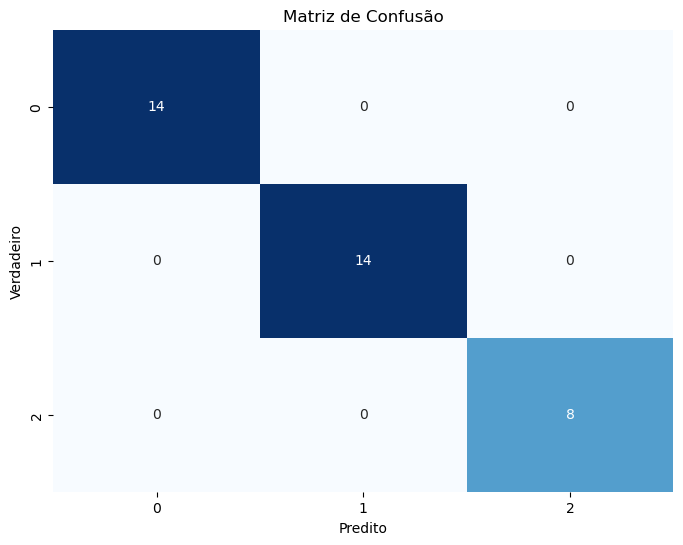

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

target_labels = df['target'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=target_labels, yticklabels=target_labels) 
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

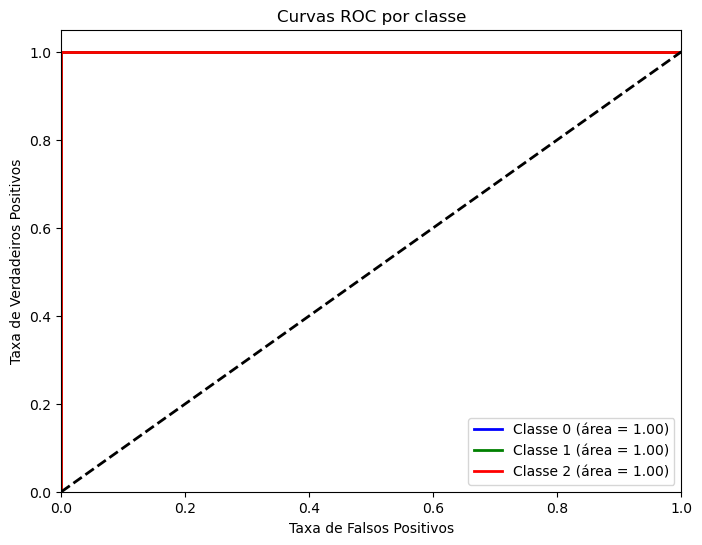

In [16]:
y_pred_proba = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {i} (área = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC por classe')
plt.legend(loc="lower right")
plt.show()

In [17]:
import mlflow
run_id = 's3://mlflow/3/68485ba5b3d54280868ca5ebf740a219/artifacts/extra_trees_model'
model = mlflow.sklearn.load_model(run_id)

columns_features = ['alcohol', 
                    'malic_acid', 
                    'ash', 
                    'alcalinity_of_ash', 
                    'magnesium',
                    'total_phenols', 
                    'flavanoids', 
                    'nonflavanoid_phenols',
                    'proanthocyanins', 
                    'hue',
                    'od280/od315_of_diluted_wines', 
                    'proline']

model.predict(df[columns_features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])